
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## 2. Данные

In [4]:
df = pd.read_csv('C:/Users/Sergey/Downloads/Churn.csv')
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

Рассмотрим размеры датасета. 

In [5]:
df.shape

(7043, 21)

В датасете 7043 строки, что говорит нам о записи 7042 человек (возможно, присутствует дубляж).Рассмотрим датасет на наличие выбросов (пропусков Nan).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Датасет без выбросов типа "Nan". Также, в датасете четыре столбца заполнены числами, однако только три имеют правильный тип float64(1), int64(2). В столбце "TotalCharges" необходимо изменить тип с "object" на "float", иначе математические операции будут недоступны. Применим функцию описательной статистики ко всему датасету.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Полученные выводы:
    1. В датасете пенсионеры (SeniorCitizen) занимают менее 25 процентов (стремится к 16%).
    2. Средний срок действия контракта на поставку услуг-32,4 месяца.Такая продолжительность контрактов практически у половины абонентов (квантиль 50% - 29 месяцев).
    3. Самая большая продолжительность контракта-6 лет.
    4. Средний чек оплаты за месяц-64,76.50% абонентов платят в месяц не менее 70,35.
    Посмотрим данные по столбцам.

In [8]:
column_names=list(df.columns)
for column in column_names:
    print(column,"_"*(15-len(column)), ":")
    print(df[column].describe())

customerID _____ :
count           7043
unique          7043
top       7590-VHVEG
freq               1
Name: customerID, dtype: object
gender _________ :
count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
SeniorCitizen __ :
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
Partner ________ :
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
Dependents _____ :
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
tenure _________ :
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
PhoneService ___ :
count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, d

**Вывод:**
1. Большее количество клиентов-мужчины (3555)
2. Большее количество абонентов не имеют партнеров "Partner" (3641)
3. Большее количество абонентов не имеют иждивенцев "Dependents" (4933)
4. У большинства абонентов подключена услуга телефон "PhoneService" (6361)
5. Почти у половины клиентов подключена услуга "MultipleLines" (3390)
6. Самая популярная технология подключения интернет- волоконно-оптическая "Fiber optic" (3096)
7. Практически половина абонентов не подключила доп. услуги: "OnlineSecurity", "OnlineBackup","DeviceProtection" и "TechSupport"
8. Самый популярный тип оплаты- ежемесячный (3875)
9. Большинству абонентов приходят электронные счета (4171)
10. Самый популярный способ оплаты- электронный (2365)

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

выполнено выше

**Вывод:** выполнено выше

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [9]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


Дубляж отсутствует в датасете.

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [11]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [13]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1178,0125-LZQXK,Male,0,No,No,15,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,1553.95,Yes
5135,1156-ZFYDO,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,No
3439,0917-EZOLA,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.15,7689.95,Yes
6788,1760-CAZHT,Male,0,No,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.80,460.20,No
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [14]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [15]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [16]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [17]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

В столбце "TotalCharges" необходимо изменить тип с "object" на "float", иначе математические операции будут недоступны.

In [18]:
df['TotalCharges']=df['TotalCharges'].apply(float)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Вывод:** Столбец "TotalCharges" имеет тип float.

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

Выведем две выборки для параметров "No" и "Yes".

In [20]:
df1_=df[(df.Churn=='No')]
df1_

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [21]:
df1=df1_.sample(1869)
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3122,8395-ETZKQ,Male,1,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.50,1193.55,No
2658,7473-ZBDSN,Female,0,Yes,Yes,14,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.80,255.55,No
1508,2811-POVEX,Female,1,Yes,Yes,23,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),88.45,2130.55,No
3118,2122-SZZZD,Male,0,No,No,44,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.50,835.50,No
3556,0895-LNKRC,Male,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,113.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5174-ITUMV,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,105.40,6989.45,No
4339,6992-TKNYO,Male,0,Yes,No,38,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),69.00,2669.45,No
875,3050-GBUSH,Female,0,No,No,3,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),34.80,113.95,No
1785,1568-LJSZU,Male,0,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.20,6392.85,No


In [22]:
df2=df[(df.Churn=='Yes')]
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


Найдем средние значения параметра "tenure" для обоих выборок.

In [23]:
a=df1['tenure'].mean().round(4)
b=df2['tenure'].mean().round(4)
a1=df1['tenure'].var()
b2=df2['tenure'].var()
print("Среднее значение для первой выборки:",a,
      "Среднее значение для второй выборки:",b,
      "Дисперсия для первой выборки:",a1,
      "Дисперсия для второй выборки:",b2)

Среднее значение для первой выборки: 37.6019 Среднее значение для второй выборки: 17.9791 Дисперсия для первой выборки: 592.3928442536447 Дисперсия для второй выборки: 381.4647677707876


Определимся с методом проверки гипотезы. Параметры наших выборок:
1. Выборки зависимы
2. Дисперсии выборок сильно отличаются
Примем метод scipy.stats.ttest_rel(). Примем уровень значимости alpha=0.05. 
Гипотезы:
H0-среднее количество месяцев, в течение которых клиент оставался в компании, не отличается между двумя выборками.
H1-среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [24]:
alpha=0.05
_,pvalue=stats.ttest_rel(df1.tenure,df2.tenure)
if pvalue<alpha:
    print(f'P-value:{pvalue:.4f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.4f}. Подтверждается нулевая гипотеза')
    

P-value:0.0000. Нулевая гипотеза отвергается


**Вывод:** Среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответсвуют ли распредения нормальному?

Исследуем два параметра на нормальное распределение значений:
1. tenure
2. MonthlyCharges
Введем гипотезы:
1.H0-имеет распределение по Гауссу
2.H1-не имеет распределение по Гауссу
Примем уровень значимости alpha=0.05. Объем выборки более 5000 значений. Примем метод К'2 Д'Агостино.

In [25]:
alpha=0.05
_,pvalue=stats.normaltest(df.tenure)
if pvalue<alpha:
    print(f'P-value:{pvalue:.4f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.4f}. Подтверждается нулевая гипотеза')
    

P-value:0.0000. Нулевая гипотеза отвергается


In [26]:
alpha=0.05
_,pvalue=stats.normaltest(df.MonthlyCharges)
if pvalue<alpha:
    print(f'P-value:{pvalue:.4f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.4f}. Подтверждается нулевая гипотеза')
    

P-value:0.0000. Нулевая гипотеза отвергается


**Вывод:**Оба параметра не имеют рапределение по Гауссу.

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

Этап №1
Для удобства приведем названия колонок к нижнему регистру. 

In [27]:
column_names=list(df.columns)
column_names

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [28]:
lower_column_names=[]
for word in column_names:
    lower_column_names.append(word.lower())

In [29]:
df.columns=lower_column_names
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Этап №2 
Закодируем категориальные столбцы, а точнее все их возможные значения. 

Столбец "gender" 1-Male, 2-Female

In [30]:
df.gender.nunique()

2

In [31]:
df['gender_code']=df['gender'].apply(lambda gender: 1 if gender=='Male' else 0) 

Столбец "partner" 1-Yes, 2-No

In [32]:
df.partner.nunique()

2

In [33]:
df['partner_code']=df['partner'].apply(lambda partner: 1 if partner=='Yes' else 0) 

Столбец "dependents" 1-Yes, 2-No

In [34]:
df.dependents.nunique()

2

In [35]:
df['dependents_code']=df['dependents'].apply(lambda dependents: 1 if dependents=='Yes' else 0) 

Столбец "phoneservice" 1-Yes, 2-No

In [36]:
df.phoneservice.nunique()

2

In [37]:
df['phoneservice_code']=df['phoneservice'].apply(lambda phoneservice: 1 if phoneservice=='Yes' else 0) 

Столбец "multiplelines" 1-Yes, 0-No, 2-No phone service

In [38]:
df.multiplelines.nunique()

3

In [39]:
df['multiplelines_code']=df['multiplelines'].apply(lambda multiplelines: 1 if multiplelines=='Yes' else (0 if multiplelines=='No' else 2)) 

Столбец "internetservice" 1-DSL, 0-Fiber optic	, 2-No

In [40]:
df.internetservice.nunique()

3

In [41]:
df['internetservice_code']=df['internetservice'].apply(lambda internetservice: 1 if internetservice=='DSL' else (0 if internetservice=='Fiber optic' else 2)) 

Столбец "onlinesecurity" 1-Yes, 0-No, 2-No internet service

In [42]:
df.onlinesecurity.nunique()

3

In [43]:
df['onlinesecurity_code']=df['onlinesecurity'].apply(lambda onlinesecurity: 1 if onlinesecurity=='Yes' else (0 if onlinesecurity=='No' else 2)) 

Столбец "onlinebackup" 1-Yes, 0-No, 2-No internet service

In [44]:
df.onlinebackup.nunique()

3

In [45]:
df['onlinebackup_code']=df['onlinebackup'].apply(lambda onlinebackup: 1 if onlinebackup=='Yes' else (0 if onlinebackup=='No' else 2)) 

Столбец "deviceprotection" 1-Yes, 0-No, 2-No internet service

In [46]:
df.deviceprotection.nunique()

3

In [47]:
df['deviceprotection_code']=df['deviceprotection'].apply(lambda deviceprotection: 1 if deviceprotection=='Yes' else (0 if deviceprotection=='No' else 2)) 

Столбец "techsupport" 1-Yes, 0-No, 2-No internet service

In [48]:
df.techsupport.nunique()

3

In [49]:
df['techsupport_code']=df['techsupport'].apply(lambda techsupport: 1 if techsupport=='Yes' else (0 if techsupport=='No' else 2)) 

Столбец "streamingtv" 1-Yes, 0-No, 2-No internet service

In [50]:
df.streamingtv.nunique()

3

In [51]:
df['streamingtv_code']=df['streamingtv'].apply(lambda streamingtv: 1 if streamingtv=='Yes' else (0 if streamingtv=='No' else 2)) 

Столбец "streamingmovies" 1-Yes, 0-No, 2-No internet service

In [52]:
df.streamingmovies.nunique()

3

In [53]:
df['streamingmovies_code']=df['streamingmovies'].apply(lambda streamingmovies: 1 if streamingmovies=='Yes' else (0 if streamingmovies=='No' else 2)) 

Столбец "contract" 1-One year, 0-Month-to-month, 2-Two year

In [54]:
df.contract.nunique()

3

In [55]:
df['contract_code']=df['contract'].apply(lambda contract: 1 if contract=='One year' else (2 if contract=='Two year' else 0)) 

Столбец "paperlessbilling" 1-Yes, 0-No

In [56]:
df.paperlessbilling.nunique()

2

In [57]:
df['paperlessbilling_code']=df['paperlessbilling'].apply(lambda paperlessbilling: 1 if paperlessbilling=='Yes' else 0) 

Столбец "paymentmethod" 1-Electronic check, 0-Mailed check, 2-Bank transfer (automatic) , 3-Credit card (automatic)

In [58]:
df.paymentmethod.nunique()

4

In [59]:
def rate_eval(paymentmethod):
    if paymentmethod=='Electronic check':
        return 1
    elif paymentmethod=='Mailed check':
        return 0
    elif paymentmethod=='Bank transfer (automatic)':
        return 2
    else:
        return 3

In [60]:
df['paymentmethod_code']=df['paymentmethod'].apply(rate_eval) 

Столбец "churn" 1-Yes, 0-No

In [61]:
df.churn.nunique()

2

In [62]:
df['churn_code']=df['churn'].apply(lambda churn: 1 if churn=='Yes' else 0) 
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_code,partner_code,dependents_code,phoneservice_code,multiplelines_code,internetservice_code,onlinesecurity_code,onlinebackup_code,deviceprotection_code,techsupport_code,streamingtv_code,streamingmovies_code,contract_code,paperlessbilling_code,paymentmethod_code,churn_code
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,2,1,0,1,0,0,0,0,0,1,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,2,1,1,0,1,1,0,0,1,0,2,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1,0,0,1,1,0,1,1,1,1,3,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,1,1,0,2,1,1,0,0,0,0,0,0,1,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1


Этап №3
Проведем полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом Churn (целевым признаком параметром "churn"). Уровень значимости alpha=0.05. Для этого:

1. Установим взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное.
2. Выберем нужные гипотезы, основываясь на типах признаков.

*Примечание: когда категориальная переменная изменяется на числа, она все равно остается категориальной! Просто теперь наш признак стал закодированным (то есть мы изменили слова на числа).

Корреляция между признаками "gender" и "churn". Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [63]:
pd.crosstab(df.churn_code,df.gender_code)
crosstab=pd.crosstab(df.churn_code,df.gender_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=0.48408,p-value:0.48658
Независимый (не удается отклонить Н0)


Корреляция между признаками "seniorcitizen" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [64]:
pd.crosstab(df.churn_code,df.seniorcitizen)
crosstab=pd.crosstab(df.churn_code,df.seniorcitizen)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=159.42630,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "partner" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [65]:
pd.crosstab(df.churn_code,df.partner_code)
crosstab=pd.crosstab(df.churn_code,df.partner_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=158.73338,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "dependents" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [66]:
pd.crosstab(df.churn_code,df.dependents_code)
crosstab=pd.crosstab(df.churn_code,df.dependents_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=189.12925,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "tenure" и "churn". Признак "churn" категориальный, признак "tenure" количественный непрерывный -метод Крамера.
Если коэффициент равен 0, это указывает на полное отсутствие связи, в то время как коэффициент, близкий к 1, указывает на сильную связь между переменными. 0.5-можно интерпретировать как умеренную связь. 

In [67]:
pd.crosstab(df.churn_code,df.tenure)
crosstab=pd.crosstab(df.churn_code,df.tenure)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
n = crosstab.sum().sum()
min_dim = min(crosstab.shape)
cramer_v = np.sqrt(stat / (n * (min_dim - 1)))
print(f"Cramer's V: {cramer_v:.5f}")

Cramer's V: 0.38892


Корреляция между признаками "phoneservice" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [68]:
pd.crosstab(df.churn_code,df.phoneservice_code)
crosstab=pd.crosstab(df.churn_code,df.phoneservice_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=0.91503,p-value:0.33878
Независимый (не удается отклонить Н0)


Корреляция между признаками "multiplelines" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [69]:
pd.crosstab(df.churn_code,df.multiplelines_code)
crosstab=pd.crosstab(df.churn_code,df.multiplelines_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=11.33044,p-value:0.00346
Зависимый (отклонить Н0)


Корреляция между признаками "internetservice" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [70]:
pd.crosstab(df.churn_code,df.internetservice_code)
crosstab=pd.crosstab(df.churn_code,df.internetservice_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=732.30959,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "onlinesecurity" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [71]:
pd.crosstab(df.churn_code,df.onlinesecurity_code)
crosstab=pd.crosstab(df.churn_code,df.onlinesecurity_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=849.99897,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "onlinebackup" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [72]:
pd.crosstab(df.churn_code,df.onlinebackup_code)
crosstab=pd.crosstab(df.churn_code,df.onlinebackup_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=601.81279,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "deviceprotection" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [73]:
pd.crosstab(df.churn_code,df.deviceprotection_code)
crosstab=pd.crosstab(df.churn_code,df.deviceprotection_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=558.41937,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "techsupport" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [74]:
pd.crosstab(df.churn_code,df.techsupport_code)
crosstab=pd.crosstab(df.churn_code,df.techsupport_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=828.19707,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "streamingtv" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [75]:
pd.crosstab(df.churn_code,df.streamingtv_code)
crosstab=pd.crosstab(df.churn_code,df.streamingtv_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=374.20394,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "streamingmovies" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [76]:
pd.crosstab(df.churn_code,df.streamingmovies_code)
crosstab=pd.crosstab(df.churn_code,df.streamingmovies_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=375.66148,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "contract" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [77]:
pd.crosstab(df.churn_code,df.contract_code)
crosstab=pd.crosstab(df.churn_code,df.contract_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=1184.59657,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "paperlessbilling" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [78]:
pd.crosstab(df.churn_code,df.paperlessbilling_code)
crosstab=pd.crosstab(df.churn_code,df.paperlessbilling_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=258.27765,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "paymentmethod" и "churn".Оба признака категориальные-метод Chi-квадрат.
H0-признаки независимы

In [79]:
pd.crosstab(df.churn_code,df.paymentmethod_code)
crosstab=pd.crosstab(df.churn_code,df.paymentmethod_code)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
print(f'Statistics={stat:.5f},p-value:{pvalue:.5f}')
if pvalue<=alpha:
    print('Зависимый (отклонить Н0)')
else:
    print('Независимый (не удается отклонить Н0)')

Statistics=648.14233,p-value:0.00000
Зависимый (отклонить Н0)


Корреляция между признаками "monthlycharges" и "churn". Признак "churn" категориальный, признак "monthlycharges" количественный непрерывный -метод Крамера.
Если коэффициент равен 0, это указывает на полное отсутствие связи, в то время как коэффициент, близкий к 1, указывает на сильную связь между переменными. 0.5-можно интерпретировать как умеренную связь. 

In [80]:
pd.crosstab(df.churn_code,df.monthlycharges)
crosstab=pd.crosstab(df.churn_code,df.monthlycharges)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
n = crosstab.sum().sum()
min_dim = min(crosstab.shape)
cramer_v = np.sqrt(stat / (n * (min_dim - 1)))
print(f"Cramer's V: {cramer_v:.5f}")

Cramer's V: 0.54911


Корреляция между признаками "totalcharges" и "churn". Признак "churn" категориальный, признак "totalcharges" количественный непрерывный -метод Крамера.
Если коэффициент равен 0, это указывает на полное отсутствие связи, в то время как коэффициент, близкий к 1, указывает на сильную связь между переменными. 0.5-можно интерпретировать как умеренную связь.

In [81]:
pd.crosstab(df.churn_code,df.totalcharges)
crosstab=pd.crosstab(df.churn_code,df.totalcharges)
stat,pvalue,_,_=stats.chi2_contingency(crosstab)
alpha=0.05
n = crosstab.sum().sum()
min_dim = min(crosstab.shape)
cramer_v = np.sqrt(stat / (n * (min_dim - 1)))
print(f"Cramer's V: {cramer_v:.5f}")

Cramer's V: 0.96172


Вывод:
    Все выявленные зависимости по степени влияния можно разделить на две группы:
        Малого влияния:
        1. churn-seniorcitizen-зависимы (stat=159.426 / p-value=0)
        2. churn-partner-зависимы (stat=158.733 / p-value=0)
        3. churn-dependents-зависимы (stat=189.129 / p-value=0)
        4. churn-tenure-зависимы, Cramer`s V=0.389, зависимость ниже средней(<0.5) => слабая
        5. churn-multiplelines-зависимы (stat=11.33 / p-value=0)
        6. churn-streamingstv-зависимы (stat=374.204 / p-value=0)
        7. churn-streamingsmovies-зависимы (stat=375.661 / p-value=0)
        8. churn-paperlessbilling-зависимы (stat=258.278 / p-value=0)
       
        Cильного влияния:
        1. churn-internetservice-зависимы (stat=735.31 / p-value=0)
        2. churn-onlinesecurity-зависимы (stat=849.999 / p-value=0)
        3. churn-onlinebackup-зависимы (stat=601.813 / p-value=0)
        4. churn-deviceprotection-зависимы (stat=558.42 / p-value=0)
        5. churn-techsupport-зависимы (stat=828.197 / p-value=0)
        6. churn-contract-зависимы (stat=1184.597 / p-value=0)
        7. churn-paymethod-зависимы (stat=648.142 / p-value=0)
        8. churn-monthlycharges-зависимы, Cramer`s V=0.549, средняя зависимость
        9. churn-totalcharges-зависимы, Cramer`s V=0.96172, высокая зависимость
        
        Пренебрежем признаками малого влияния по отношению к признаку "churn". Сконцентрируемся на второй группе.
        Выстроим в порядке уменьшения влияния:
            1. churn-totalcharges-зависимы, Cramer`s V=0.96172, высокая зависимость  ушедшие-полная стоимость
            2. churn-monthlycharges-зависимы, Cramer`s V=0.549, средняя зависимость  ушедшие-месячная стоимость
            3. churn-contract-зависимы (stat=1184.597 / p-value=0)                   ушедшие-тип контракта     
            4. churn-onlinesecurity-зависимы (stat=849.999 / p-value=0)              ушедшие-услуга безопасности 
            5. churn-techsupport-зависимы (stat=828.197 / p-value=0)                 ушедшие-услуга тех.поддержки
            6. churn-internetservice-зависимы (stat=735.31 / p-value=0)              ушедшие-услуга интернет-провайдера
            7. churn-paymethod-зависимы (stat=648.142 / p-value=0)                   ушедшие-способ оплаты
            8. churn-onlinebackup-зависимы (stat=601.813 / p-value=0)                ушедшие-услуга резервного копирования
            9. churn-deviceprotection-зависимы (stat=558.42 / p-value=0)             ушедшие-услуга защиты устройства
            

Рассмотрим взаимосвязь между стоимостью и выборкой ушедших клиентов. Сгруппируем признаки "стоимость":
            1. churn-totalcharges-зависимы, Cramer`s V=0.96172, высокая зависимость  ушедшие-полная стоимость
            2. churn-monthlycharges-зависимы, Cramer`s V=0.549, средняя зависимость  ушедшие-месячная стоимость

In [82]:
df_s = pd.DataFrame({
              'churn': df['churn'],
              'totalcharges': df['totalcharges'],
              'monthlycharges': df['monthlycharges']
              })
df_s.sort_values(by=['churn', 'totalcharges', 'monthlycharges'])

,churn,totalcharges,monthlycharges
5218,No,0.00,19.70
3331,No,0.00,19.85
4380,No,0.00,20.00
753,No,0.00,20.25
3826,No,0.00,25.35
...,...,...,...
5581,Yes,7856.00,113.15
6537,Yes,7968.85,115.65
3890,Yes,8109.80,109.25
1306,Yes,8127.60,115.55


Отсюда можно сделать вывод,что выборка расторгнувших контракты с компанией прямо коррелируются с графиком увеличения стоимости как полного платежа, так и ежемесячного. Распределение платежей апроксимированно можно описать с помощью гиперболы вида y=k/x.

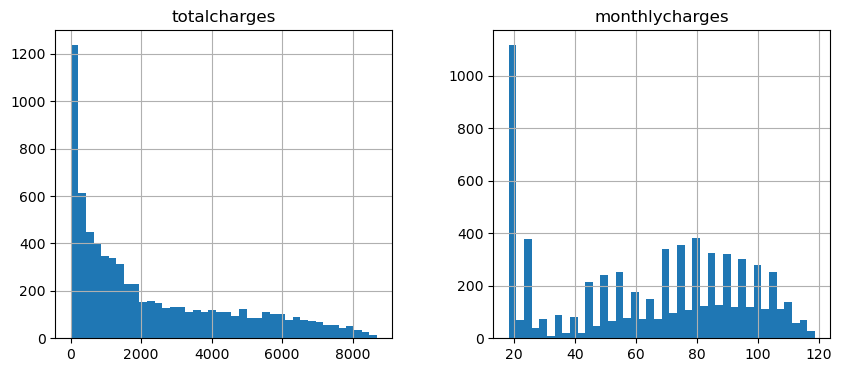

In [83]:
df_s.hist(figsize=(10,4),bins=40);

Рассмотрим взаимосвязь между услугами, предоставляемыми гражданам, и выборкой клиентов расторгнувших контракты. Сгруппируем признаки "услуги":  
           
            1. churn-onlinesecurity-зависимы (stat=849.999 / p-value=0)              ушедшие-услуга безопасности 
            2. churn-techsupport-зависимы (stat=828.197 / p-value=0)                 ушедшие-услуга тех.поддержки
            3. churn-internetservice-зависимы (stat=735.31 / p-value=0)              ушедшие-услуга интернет-провайдера
            4. churn-onlinebackup-зависимы (stat=601.813 / p-value=0)                ушедшие-услуга резервного копирования
            5. churn-deviceprotection-зависимы (stat=558.42 / p-value=0)             ушедшие-услуга защиты устройства

In [84]:
u_df= pd.DataFrame({
              'churn': df['churn'],          
              'onlinesecurity': df['onlinesecurity'],
              'techsupport': df['techsupport'],
              'internetservice': df['internetservice'],
              'onlinebackup': df['onlinebackup'],
              'deviceprotection': df['deviceprotection']
              })
us_df=u_df[(df.churn=='Yes')]
us_df.sort_values(by=['churn'])
us_df

,churn,onlinesecurity,techsupport,internetservice,onlinebackup,deviceprotection
2,Yes,Yes,No,DSL,Yes,No
4,Yes,No,No,Fiber optic,No,No
5,Yes,No,No,Fiber optic,No,Yes
8,Yes,No,Yes,Fiber optic,No,Yes
13,Yes,No,No,Fiber optic,Yes,Yes
...,...,...,...,...,...,...
7021,Yes,No,Yes,DSL,No,No
7026,Yes,No,No,DSL,No,No
7032,Yes,No,No,Fiber optic,No,No
7034,Yes,Yes,No,Fiber optic,Yes,Yes


In [85]:
us_df.describe()

,churn,onlinesecurity,techsupport,internetservice,onlinebackup,deviceprotection
count,1869,1869,1869,1869,1869,1869
unique,1,3,3,3,3,3
top,Yes,No,No,Fiber optic,No,No
freq,1869,1461,1446,1297,1233,1211


Прослеживаются следующие закономерности:
    1. услуга обеспечения безопасности была подключена у 78% (1461)
    2. услуга тех.поддержки была подключена у 77.4%          (1446)
    3. услуга интернет-провайдера была подключена у 69.4%    (1297)
    4. услуга резервного копирования была подключена у 66%   (1233)
    5. услуга защиты устройства была подключена у 65%      (1211)
 Таким образом, у большинства ушедших клиентов был подключен весь спектр доп. услуг (не менее 65%)

Рассмотрим взаимосвязь между условиями контракта и выборкой клиентов расторгнувших контракты. Сгруппируем признаки по условию "контракт/оплата":

            1. churn-contract-зависимы (stat=1184.597 / p-value=0)                   ушедшие-тип контракта     
            2. churn-paymethod-зависимы (stat=648.142 / p-value=0)                   ушедшие-способ оплаты
            

In [86]:
df_k = pd.DataFrame({
              'churn': df['churn'],
              'contract': df['contract'],
              'paymentmethod': df['paymentmethod']
              })
df_k.sort_values(by=['churn', 'contract', 'paymentmethod']).tail(20)

,churn,contract,paymentmethod
5589,Yes,Two year,Credit card (automatic)
6289,Yes,Two year,Credit card (automatic)
6724,Yes,Two year,Credit card (automatic)
6785,Yes,Two year,Credit card (automatic)
336,Yes,Two year,Electronic check
975,Yes,Two year,Electronic check
2003,Yes,Two year,Electronic check
2790,Yes,Two year,Electronic check
3111,Yes,Two year,Electronic check
3803,Yes,Two year,Electronic check


Рассмотрим подробнее какие условия контракта и способ оплаты имели ушедшие клиенты

In [87]:
df_k1=df_k[(df.churn=='Yes')]
df_k1

,churn,contract,paymentmethod
2,Yes,Month-to-month,Mailed check
4,Yes,Month-to-month,Electronic check
5,Yes,Month-to-month,Electronic check
8,Yes,Month-to-month,Electronic check
13,Yes,Month-to-month,Bank transfer (automatic)
...,...,...,...
7021,Yes,One year,Electronic check
7026,Yes,Month-to-month,Bank transfer (automatic)
7032,Yes,Month-to-month,Electronic check
7034,Yes,Month-to-month,Credit card (automatic)


In [88]:
df_k1.describe()

,churn,contract,paymentmethod
count,1869,1869,1869
unique,1,3,4
top,Yes,Month-to-month,Electronic check
freq,1869,1655,1071


В итоге, получили:
1. Большинство ушедших клиентов имели краткосрочный контракт на месяц (1655)- 88.6%
2. Самый популярный способ оплаты-Electronic check (57%)

Построим тепловую карту корреляции Phik

In [89]:
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['churn_code', 'contract_code', 'paymentmethod_code', 'totalcharges', 'monthlycharges', 'onlinesecurity_code', 'techsupport_code', 'internetservice_code', 'onlinebackup_code', 'deviceprotection_code']


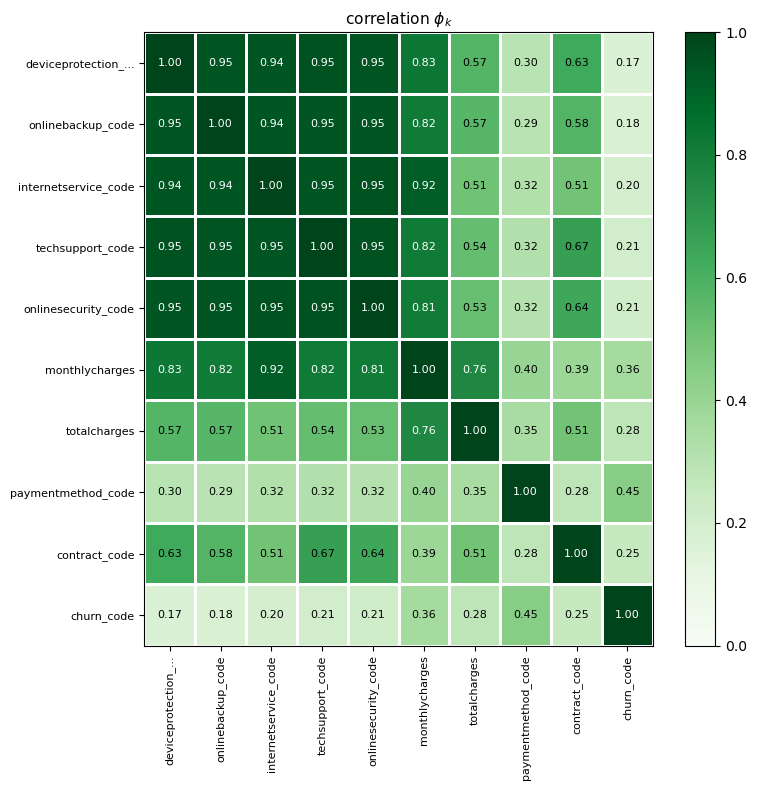

In [98]:
data=pd.DataFrame({'churn_code': df['churn_code'],
                  'contract_code': df['contract_code'], 
                   'paymentmethod_code': df['paymentmethod_code'],
                    'totalcharges': df['totalcharges'],
                   'monthlycharges': df['monthlycharges'],
                   'onlinesecurity_code': df['onlinesecurity_code'], 
                   'techsupport_code': df['techsupport_code'],
                   'internetservice_code': df['internetservice_code'], 
                   'onlinebackup_code': df['onlinebackup_code'],
                   'deviceprotection_code': df['deviceprotection_code'],
                    })
phik_overview=data.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                       x_labels=phik_overview.columns,
                       y_labels=phik_overview.index,
                       vmin=0,vmax=1,color_map='Greens',
                       title=r"correlation $\phi_k$",
                       fontsize_factor=0.8, figsize=(8,8))
plt.tight_layout()

# Общий вывод

Cтоимость:

Можно сделать вывод,что выборка клиентов, расторгнувших контракты с компанией, прямо коррелируется с графиком увеличения стоимости оплат, как полного платежа, так и ежемесячного. Распределение платежей полного платежа, котрый имеет наибольшую корреляцию с признаком "churn" апроксимированно можно описать с помощью гиперболы вида y=k/x.

Услуги:
Прослеживаются следующие закономерности:
    1. услуга обеспечения безопасности была подключена у 78% (1461)
    2. услуга тех.поддержки была подключена у 77.4%          (1446)
    3. услуга интернет-провайдера была подключена у 69.4%    (1297)
    4. услуга резервного копирования была подключена у 66%   (1233)
    5. услуга защиты устройства была подключена у 65%        (1211)
 Таким образом, у большинства ушедших клиентов был подключен весь спектр доп. услуг (не менее 65%)
Контракт и оплата:
    1. Большинство ушедших клиентов имели краткосрочный контракт на месяц (1655)- 88.6%
    2. Самый популярный способ оплаты-Electronic check (57%)

Общий вывод:
1. Общий процент ушедших клиентов составляет не более 26.5%.
2. Большинство ушедших клиентов имели краткосрочные контракты на месяц 88.6%
3. У большинства ушедших клиентов был подключен весь спектр доп. услуг (не менее 65%)

Возможные причины: высокая стоимость при подключении всего пакета услуг, "сезонная" миграция к другой компании при появлении специальных предложений низких цен, возможное неудовлетворение клиентов качеством полного пакета услуг.
